In [17]:
import numpy as np
from numpy.random import seed, normal, shuffle, randn
from numpy import cos, sin
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from neural import NNet
import matplotlib.pyplot as plt

In [39]:
x = np.linspace(0, 2, 100)
y = 1 + 0.3 * x**3 + 0.4 * x ** 2 + x + randn(100)

x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [40]:
from sklearn.linear_model import 

In [41]:
lreg = LinearRegression()
lreg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
plt.plot(x, lreg.predict(x), c="red", linewidth=2)
plt.scatter(x, y)

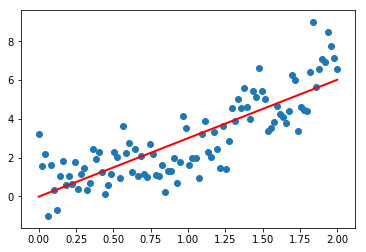

In [43]:
plt.show()

In [2]:
def transform_data_rad(data, radius):
    out_data = np.zeros_like(data)
    for ix, (x, y) in enumerate(data):
        transformed = radius * cos(ix) + x/10, radius * sin(ix) + y/10
        out_data[ix, :] = transformed
        
    return out_data

def transform_data_group(data, mean):
    return data + mean

def make_sample_data(transform, nsamples, ndim, target_col, *args, **kwargs):
    """
    Create data for a binary classification problem under a given transormation function
    """
    noise = normal(size=(nsamples, ndim))
    inputs = transform(noise, *args, **kwargs)
    target = np.zeros((nsamples, 2))
    target[:, target_col] = 1
    
    return inputs, target

def group_samples(input1, input2, target1, target2, set_seed=None):
    seed(set_seed)
    inputs = np.append(input1, input2, axis=0)
    targets = np.append(target1, target2, axis=0)
    data = [(input.reshape(-1, 1), target.reshape(-1, 1))
            for input, target in zip(inputs, targets)]
    shuffle(data)
    return data

In [3]:
input1, target1 = make_sample_data(transform_data_rad, 2000, 2, 0, radius=0.7)
input2, target2 = make_sample_data(transform_data_rad, 2000, 2, 1, radius=0.4)
data = group_samples(input1, input2, target1, target2, set_seed=1643)

In [4]:
input1, target1 = make_sample_data(transform_data_group, 2000, 2, 0, mean=0.7)
input2, target2 = make_sample_data(transform_data_group, 2000, 2, 1, mean=-0.6)
data = group_samples(input1, input2, target1, target2, set_seed=1643)

In [5]:
train_data = data[800:]
test_data = data[:800]

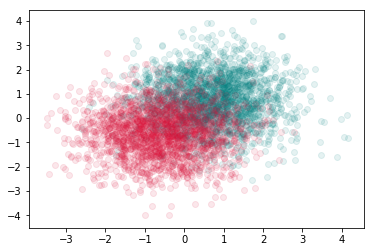

In [6]:
plt.scatter(*input1.T, alpha=0.1, c="teal")
plt.scatter(*input2.T, alpha=0.1, c="crimson")
plt.show()

In [7]:
import pickle
with open("train.pkl", "wb") as file:
    pickle.dump(train_data, file)
    
with open("test.pkl", "wb") as file:
    pickle.dump(test_data, file)

In [8]:
from neural import NNet
net = NNet([2, 3, 3, 2])
net.SGD(train_data, 10, 20, 1, test_data=test_data)

[[ 0.05319629 -0.02396193]
 [ 0.11124115  0.02759643]
 [ 0.0085093  -0.02528813]] [[-0.20125279]
 [ 0.57610652]
 [-1.50852529]]
[[ 0.23118746  0.01394589  0.03623885]
 [-0.07722258 -0.07847143  0.0280345 ]
 [-0.00065684  0.02276564 -0.12762052]] [[-0.69125056]
 [-2.10222173]
 [ 0.76242442]]
[[-0.24910135 -0.2088446  -0.46721793]
 [-0.25131416 -0.0263372  -0.33180477]] [[ 0.44039898]
 [ 0.30840953]]
[[ 0.05319629 -0.02396193]
 [ 0.11124115  0.02759643]
 [ 0.0085093  -0.02528813]] [[-0.20125279]
 [ 0.57610652]
 [-1.50852529]]
[[ 0.23118746  0.01394589  0.03623885]
 [-0.07722258 -0.07847143  0.0280345 ]
 [-0.00065684  0.02276564 -0.12762052]] [[-0.69125056]
 [-2.10222173]
 [ 0.76242442]]
[[-0.24910135 -0.2088446  -0.46721793]
 [-0.25131416 -0.0263372  -0.33180477]] [[ 0.44039898]
 [ 0.30840953]]
[[ 0.05319629 -0.02396193]
 [ 0.11124115  0.02759643]
 [ 0.0085093  -0.02528813]] [[-0.20125279]
 [ 0.57610652]
 [-1.50852529]]
[[ 0.23118746  0.01394589  0.03623885]
 [-0.07722258 -0.07847143  0.

 [ 0.76242442]]
[[-0.24910135 -0.2088446  -0.46721793]
 [-0.25131416 -0.0263372  -0.33180477]] [[ 0.44039898]
 [ 0.30840953]]
[[ 0.05319629 -0.02396193]
 [ 0.11124115  0.02759643]
 [ 0.0085093  -0.02528813]] [[-0.20125279]
 [ 0.57610652]
 [-1.50852529]]
[[ 0.23118746  0.01394589  0.03623885]
 [-0.07722258 -0.07847143  0.0280345 ]
 [-0.00065684  0.02276564 -0.12762052]] [[-0.69125056]
 [-2.10222173]
 [ 0.76242442]]
[[-0.24910135 -0.2088446  -0.46721793]
 [-0.25131416 -0.0263372  -0.33180477]] [[ 0.44039898]
 [ 0.30840953]]
[[ 0.05319629 -0.02396193]
 [ 0.11124115  0.02759643]
 [ 0.0085093  -0.02528813]] [[-0.20125279]
 [ 0.57610652]
 [-1.50852529]]
[[ 0.23118746  0.01394589  0.03623885]
 [-0.07722258 -0.07847143  0.0280345 ]
 [-0.00065684  0.02276564 -0.12762052]] [[-0.69125056]
 [-2.10222173]
 [ 0.76242442]]
[[-0.24910135 -0.2088446  -0.46721793]
 [-0.25131416 -0.0263372  -0.33180477]] [[ 0.44039898]
 [ 0.30840953]]
[[ 0.05319629 -0.02396193]
 [ 0.11124115  0.02759643]
 [ 0.0085093  -0

[[ 0.05319629 -0.02396193]
 [ 0.11124115  0.02759643]
 [ 0.0085093  -0.02528813]] [[-0.20125279]
 [ 0.57610652]
 [-1.50852529]]
[[ 0.23118746  0.01394589  0.03623885]
 [-0.07722258 -0.07847143  0.0280345 ]
 [-0.00065684  0.02276564 -0.12762052]] [[-0.69125056]
 [-2.10222173]
 [ 0.76242442]]
[[-0.24910135 -0.2088446  -0.46721793]
 [-0.25131416 -0.0263372  -0.33180477]] [[ 0.44039898]
 [ 0.30840953]]
[[ 0.05319629 -0.02396193]
 [ 0.11124115  0.02759643]
 [ 0.0085093  -0.02528813]] [[-0.20125279]
 [ 0.57610652]
 [-1.50852529]]
[[ 0.23118746  0.01394589  0.03623885]
 [-0.07722258 -0.07847143  0.0280345 ]
 [-0.00065684  0.02276564 -0.12762052]] [[-0.69125056]
 [-2.10222173]
 [ 0.76242442]]
[[-0.24910135 -0.2088446  -0.46721793]
 [-0.25131416 -0.0263372  -0.33180477]] [[ 0.44039898]
 [ 0.30840953]]
[[ 0.05319629 -0.02396193]
 [ 0.11124115  0.02759643]
 [ 0.0085093  -0.02528813]] [[-0.20125279]
 [ 0.57610652]
 [-1.50852529]]
[[ 0.23118746  0.01394589  0.03623885]
 [-0.07722258 -0.07847143  0.

 [ 0.76242442]]
[[-0.24910135 -0.2088446  -0.46721793]
 [-0.25131416 -0.0263372  -0.33180477]] [[ 0.44039898]
 [ 0.30840953]]
[[ 0.05319629 -0.02396193]
 [ 0.11124115  0.02759643]
 [ 0.0085093  -0.02528813]] [[-0.20125279]
 [ 0.57610652]
 [-1.50852529]]
[[ 0.23118746  0.01394589  0.03623885]
 [-0.07722258 -0.07847143  0.0280345 ]
 [-0.00065684  0.02276564 -0.12762052]] [[-0.69125056]
 [-2.10222173]
 [ 0.76242442]]
[[-0.24910135 -0.2088446  -0.46721793]
 [-0.25131416 -0.0263372  -0.33180477]] [[ 0.44039898]
 [ 0.30840953]]
[[ 0.05319629 -0.02396193]
 [ 0.11124115  0.02759643]
 [ 0.0085093  -0.02528813]] [[-0.20125279]
 [ 0.57610652]
 [-1.50852529]]
[[ 0.23118746  0.01394589  0.03623885]
 [-0.07722258 -0.07847143  0.0280345 ]
 [-0.00065684  0.02276564 -0.12762052]] [[-0.69125056]
 [-2.10222173]
 [ 0.76242442]]
[[-0.24910135 -0.2088446  -0.46721793]
 [-0.25131416 -0.0263372  -0.33180477]] [[ 0.44039898]
 [ 0.30840953]]
[[ 0.05319629 -0.02396193]
 [ 0.11124115  0.02759643]
 [ 0.0085093  -0

 [ 0.30840953]]
[[ 0.05319629 -0.02396193]
 [ 0.11124115  0.02759643]
 [ 0.0085093  -0.02528813]] [[-0.20125279]
 [ 0.57610652]
 [-1.50852529]]
[[ 0.23118746  0.01394589  0.03623885]
 [-0.07722258 -0.07847143  0.0280345 ]
 [-0.00065684  0.02276564 -0.12762052]] [[-0.69125056]
 [-2.10222173]
 [ 0.76242442]]
[[-0.24910135 -0.2088446  -0.46721793]
 [-0.25131416 -0.0263372  -0.33180477]] [[ 0.44039898]
 [ 0.30840953]]
[[ 0.05319629 -0.02396193]
 [ 0.11124115  0.02759643]
 [ 0.0085093  -0.02528813]] [[-0.20125279]
 [ 0.57610652]
 [-1.50852529]]
[[ 0.23118746  0.01394589  0.03623885]
 [-0.07722258 -0.07847143  0.0280345 ]
 [-0.00065684  0.02276564 -0.12762052]] [[-0.69125056]
 [-2.10222173]
 [ 0.76242442]]
[[-0.24910135 -0.2088446  -0.46721793]
 [-0.25131416 -0.0263372  -0.33180477]] [[ 0.44039898]
 [ 0.30840953]]
[[ 0.05319629 -0.02396193]
 [ 0.11124115  0.02759643]
 [ 0.0085093  -0.02528813]] [[-0.20125279]
 [ 0.57610652]
 [-1.50852529]]
[[ 0.23118746  0.01394589  0.03623885]
 [-0.07722258

 [-0.25131416 -0.0263372  -0.33180477]] [[ 0.44039898]
 [ 0.30840953]]
[[ 0.05319629 -0.02396193]
 [ 0.11124115  0.02759643]
 [ 0.0085093  -0.02528813]] [[-0.20125279]
 [ 0.57610652]
 [-1.50852529]]
[[ 0.23118746  0.01394589  0.03623885]
 [-0.07722258 -0.07847143  0.0280345 ]
 [-0.00065684  0.02276564 -0.12762052]] [[-0.69125056]
 [-2.10222173]
 [ 0.76242442]]
[[-0.24910135 -0.2088446  -0.46721793]
 [-0.25131416 -0.0263372  -0.33180477]] [[ 0.44039898]
 [ 0.30840953]]
[[ 0.05319629 -0.02396193]
 [ 0.11124115  0.02759643]
 [ 0.0085093  -0.02528813]] [[-0.20125279]
 [ 0.57610652]
 [-1.50852529]]
[[ 0.23118746  0.01394589  0.03623885]
 [-0.07722258 -0.07847143  0.0280345 ]
 [-0.00065684  0.02276564 -0.12762052]] [[-0.69125056]
 [-2.10222173]
 [ 0.76242442]]
[[-0.24910135 -0.2088446  -0.46721793]
 [-0.25131416 -0.0263372  -0.33180477]] [[ 0.44039898]
 [ 0.30840953]]
[[ 0.05319629 -0.02396193]
 [ 0.11124115  0.02759643]
 [ 0.0085093  -0.02528813]] [[-0.20125279]
 [ 0.57610652]
 [-1.50852529

KeyboardInterrupt: 

In [8]:
vals = [(x, np.argmax(net.forwardpropagate(x)), np.argmax(y)) for x,y in test_data]

plt.figure(figsize=(15,10), dpi=100)
for datum, pred, real in vals:
    # Predicted value
    if pred == real:
        alpha = 0.2
        marker = "o"
        c = "teal" if pred == 1 else "crimson"
    else:
        alpha = 1
        marker = "x"
        # Predicted 1st class, but wasn't, or
        # predicted 2nd class, but wasn't
        c = "teal" if pred == 1 else "crimson"
    plt.scatter(*datum, c=c, alpha=alpha, marker=marker)
plt.show()    

NameError: name 'net' is not defined

# MNIST dataset 

In [9]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [10]:
mnist = fetch_mldata("mnist original")

In [11]:
X_train, X_test, y_train, y_test = train_test_split(mnist["data"], mnist["target"], test_size=0.2)

y_train = ohe.fit_transform(y_train.reshape(-1,1))
y_test = ohe.fit_transform(y_test.reshape(-1,1))

In [12]:
mnist_train = [(x.reshape(-1,1), y.reshape(-1,1)) for x, y in zip(X_train, y_train)]
mnist_test= [(x.reshape(-1,1), y.reshape(-1,1)) for x, y in zip(X_test, y_test)]

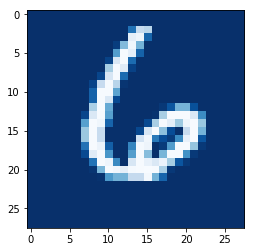

In [13]:
plt.imshow(mnist_train[0][0].reshape(28,28), cmap="Blues_r")
plt.show()

In [16]:
net = NNet([784, 1000, 10])
net.SGD(mnist_test, 20, 30, 0)

/Users/gerardoduran/Documents/nnets_intro/neural.py:11: RuntimeWarning: overflow encountered in exp
  sigmoid = vectorize(lambda z: 1 / (1 +  exp(-z)))


KeyboardInterrupt: 

In [28]:
mnist_train[0][1].shape

(10,)

In [31]:
train_data[0][1].shape

(2, 1)